## 데이터 로드

In [129]:
import pandas as pd

train = pd.read_csv('walmart/train.csv')
test = pd.read_csv('walmart/test.csv')
features = pd.read_csv('walmart/features.csv')
stores = pd.read_csv('walmart/stores.csv')

print(train.shape)
train.head()

(421570, 5)


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [130]:
print(features.shape)
features.head()

(8190, 12)


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [131]:
print(stores.shape)
stores.head()

(45, 3)


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [132]:
train_df = pd.merge(train, features, on = ['Store','Date','IsHoliday'], how='left')
train_df = pd.merge(train_df, stores, on='Store', how='left')
train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [133]:
test_df = pd.merge(test, features, on = ['Store','Date','IsHoliday'], how='left')
test_df = pd.merge(test_df, stores, on='Store', how='left')
test_df.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315
1,1,1,2012-11-09,False,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,A,151315
2,1,1,2012-11-16,False,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,A,151315
3,1,1,2012-11-23,True,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,A,151315
4,1,1,2012-11-30,False,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573,A,151315


## EDA

#### Stores, Dept

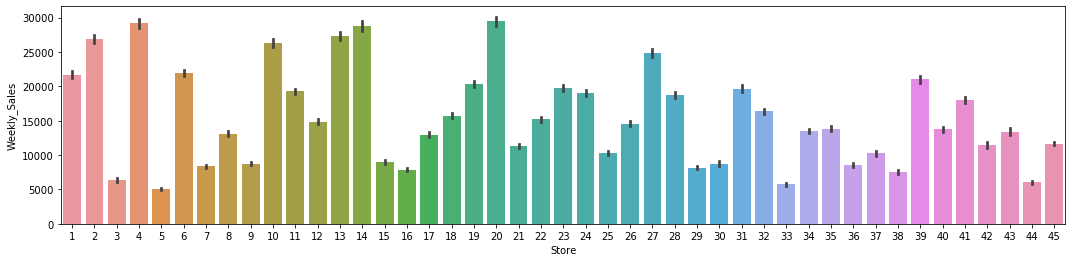

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(18,4))
sns.barplot(data = train_df, x='Store', y='Weekly_Sales')

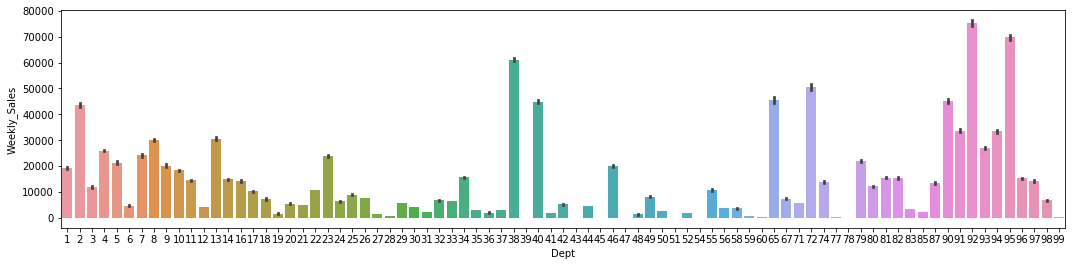

In [135]:
plt.figure(figsize=(18,4))
sns.barplot(data=train_df, x='Dept', y='Weekly_Sales')

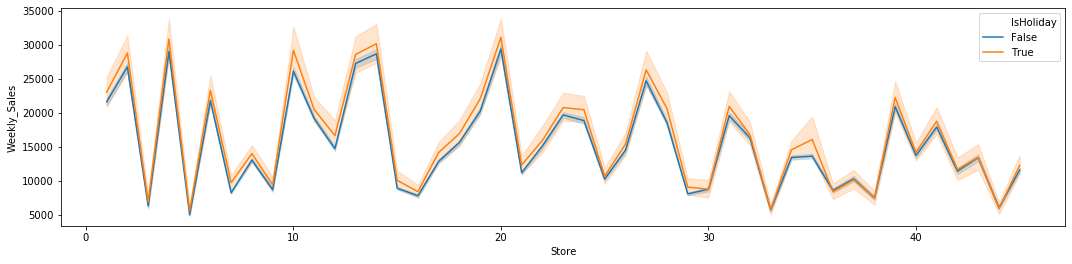

In [136]:
plt.figure(figsize=(18,4))
sns.lineplot(data=train_df, x='Store', y='Weekly_Sales', hue='IsHoliday')

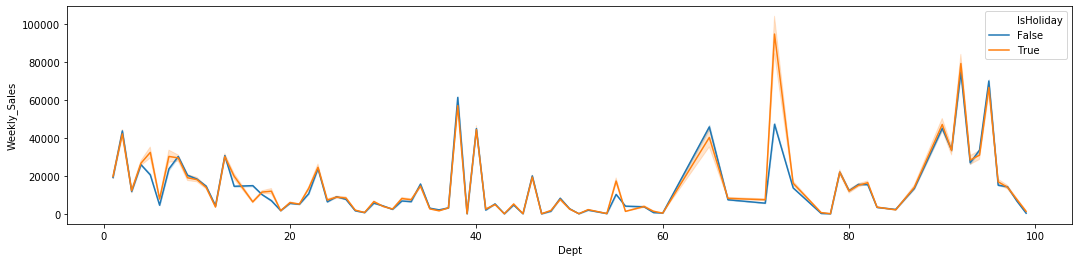

In [137]:
plt.figure(figsize=(18,4))
sns.lineplot(data=train_df, x='Dept', y='Weekly_Sales', hue='IsHoliday')

#### Date

    train 데이터 : 2010년 2월 ~ 2012년 10월
    test 데이터 : 2012년 11월 ~ 2013년 7월

In [138]:
train_df['Date'] = pd.to_datetime(train_df['Date'])
train_df['Year'] = train_df['Date'].dt.year
train_df['Month'] = train_df['Date'].dt.month
train_df['Week'] = train_df['Date'].dt.week
train_df['Weekday'] = train_df['Date'].dt.weekday

train_df[['Date', 'Year', 'Month','Week', 'Weekday']].head()

,Date,Year,Month,Week,Weekday
0,2010-02-05,2010,2,5,4
1,2010-02-12,2010,2,6,4
2,2010-02-19,2010,2,7,4
3,2010-02-26,2010,2,8,4
4,2010-03-05,2010,3,9,4


In [139]:
test_df['Date'] = pd.to_datetime(test_df['Date'])
test_df['Year'] = test_df['Date'].dt.year
test_df['Month'] = test_df['Date'].dt.month
test_df['Week'] = test_df['Date'].dt.week
test_df['Weekday'] = test_df['Date'].dt.weekday

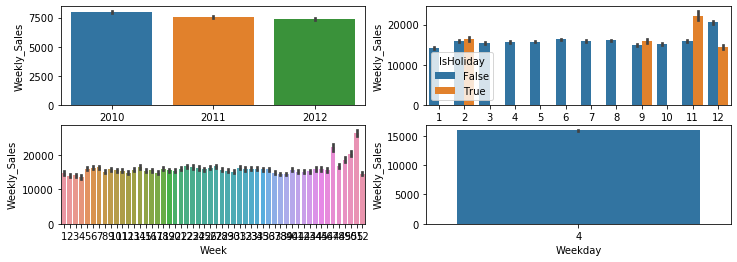

In [140]:
# 년/월/요일 별 매출액 평균값 시각화
from numpy import median
figure, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2)

figure.set_size_inches(12,4)

sns.barplot(data = train_df, x='Year', y='Weekly_Sales', ax=ax1, estimator=median)
sns.barplot(data = train_df, x='Month', y='Weekly_Sales', ax=ax2, hue='IsHoliday')
sns.barplot(data = train_df, x='Week', y='Weekly_Sales', ax=ax3)
sns.barplot(data = train_df, x='Weekday', y='Weekly_Sales', ax=ax4)

# 2월 superbowl, 9월 laborday는 매출액에 큰 영향이 없으나
# 11월 thanksgiving에는 매출액이 확 뛰고, 12월 christmas에는 매출액이 확 줄어듬

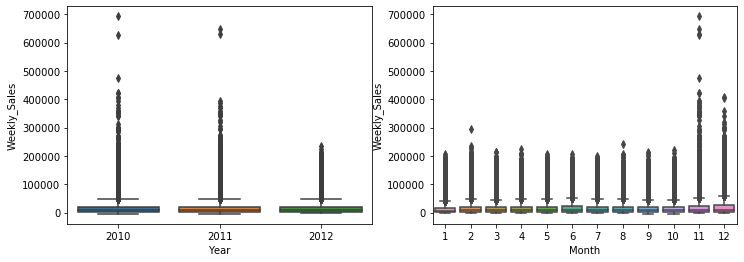

In [141]:
# 년/월별 매출액 boxplot 시각화
figure, ((ax1,ax2)) = plt.subplots(nrows=1, ncols=2)

figure.set_size_inches(12,4)

sns.boxplot(data = train_df, x='Year', y='Weekly_Sales', ax=ax1)
sns.boxplot(data = train_df, x='Month', y='Weekly_Sales', ax=ax2)

In [142]:
# 연도별 매출액 차이는 크지 않은 편
# 연말에 소비가 크게 증가, 연초에는 크게 감소
# 측정 주기가 1주일 단위라서 weekday는 필요없음

#### IsHoliday

    train 데이터 : 2010년 2월 ~ 2012년 10월
    test 데이터 : 2012년 11월 ~ 2013년 7월

    Super Bowl:   2010/02/12, 2011/02/11, 2012/02/10, 2013/02/08
    Labor Day:    2010/09/10, 2011/09/09, 2012/09/07, 2013/09/06
    Thanksgiving: 2010/11/26, 2011/11/25, 2012/11/23, 2013/11/29
    Christmas:    2010/12/31, 2011/12/30, 2012/12/28, 2013/12/27

In [143]:
superbowl = ['2010-02-12', '2011-02-11', '2012-02-10', '2013-02-08']
laborday = ['2010-09-10', '2011-09-09', '2012-09-07', '2013-09-06']
thanksgiving = ['2010-11-26', '2011-11-25', '2012-11-23', '2013-11-29']
christmas = ['2010-12-31', '2011-12-30', '2012-12-28', '2013-12-27']

In [144]:
# thanksgiving 칼럼만들기
thanks1 = train_df['Date']=='2010-11-26'
thanks2 = train_df['Date']=='2011-11-25'
thanks3 = train_df['Date']=='2012-11-23'
thanks4 = train_df['Date']=='2013-12-27'
train_df.loc[thanks1 | thanks2 | thanks3 | thanks4, 'Thanksgiving'] = 1
train_df['Thanksgiving'] = train_df['Thanksgiving'].fillna(0)

thanks1 = test_df['Date']=='2010-11-26'
thanks2 = test_df['Date']=='2011-11-25'
thanks3 = test_df['Date']=='2012-11-23'
thanks4 = test_df['Date']=='2013-12-27'
test_df.loc[thanks1 | thanks2 | thanks3 | thanks4, 'Thanksgiving'] = 1
test_df['Thanksgiving'] = test_df['Thanksgiving'].fillna(0)

train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Week,Weekday,Thanksgiving
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,...,NaN,211.096358,8.106,A,151315,2010,2,5,4,0.0
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,...,NaN,211.242170,8.106,A,151315,2010,2,6,4,0.0
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,...,NaN,211.289143,8.106,A,151315,2010,2,7,4,0.0
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,...,NaN,211.319643,8.106,A,151315,2010,2,8,4,0.0
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,...,NaN,211.350143,8.106,A,151315,2010,3,9,4,0.0


In [145]:
# christmas 칼럼만들기
christ1 = train_df['Date']=='2010-12-31'
christ2 = train_df['Date']=='2011-12-30'
christ3 = train_df['Date']=='2012-12-28'
christ4 = train_df['Date']=='2013-12-27'
train_df.loc[christ1 | christ2 | christ3 | christ4, 'Christmas'] = 1
train_df['Christmas'] = train_df['Christmas'].fillna(0)

christ1 = test_df['Date']=='2010-12-31'
christ2 = test_df['Date']=='2011-12-30'
christ3 = test_df['Date']=='2012-12-28'
christ4 = test_df['Date']=='2013-12-27'
test_df.loc[christ1 | christ2 | christ3 | christ4, 'Christmas'] = 1
test_df['Christmas'] = test_df['Christmas'].fillna(0)

test_df.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,CPI,Unemployment,Type,Size,Year,Month,Week,Weekday,Thanksgiving,Christmas
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,...,223.462779,6.573,A,151315,2012,11,44,4,0.0,0.0
1,1,1,2012-11-09,False,61.24,3.314,11421.32,3370.89,40.28,4646.79,...,223.481307,6.573,A,151315,2012,11,45,4,0.0,0.0
2,1,1,2012-11-16,False,52.92,3.252,9696.28,292.10,103.78,1133.15,...,223.512911,6.573,A,151315,2012,11,46,4,0.0,0.0
3,1,1,2012-11-23,True,56.23,3.211,883.59,4.17,74910.32,209.91,...,223.561947,6.573,A,151315,2012,11,47,4,1.0,0.0
4,1,1,2012-11-30,False,52.34,3.207,2460.03,NaN,3838.35,150.57,...,223.610984,6.573,A,151315,2012,11,48,4,0.0,0.0


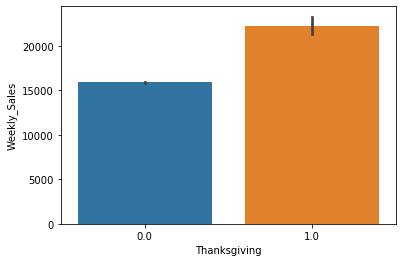

In [146]:
# IsHoliday 칼럼의 False->0, True->1
sns.barplot(data=train_df, x='Thanksgiving', y='Weekly_Sales')

#### Tempearture

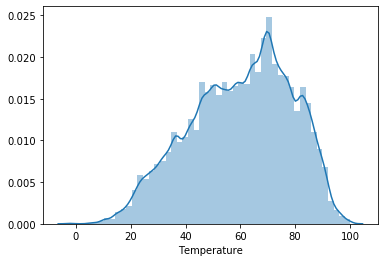

In [147]:
sns.distplot(train_df['Temperature'])

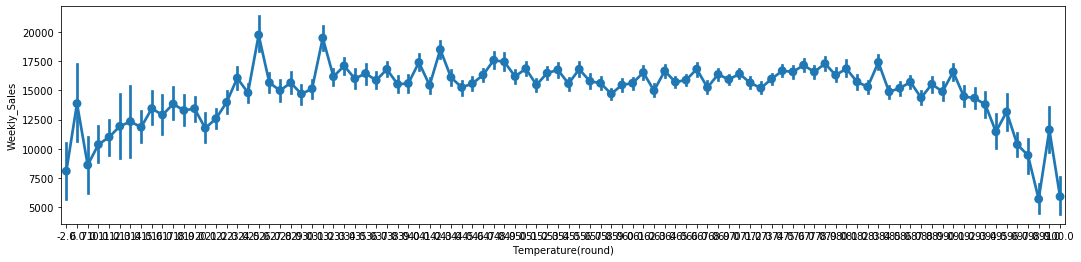

In [148]:
# 온도 컬럼을 반올림
train_df['Temperature(round)'] = train_df['Temperature'].round()
test_df['Temperature(round)'] = test_df['Temperature'].round()

plt.figure(figsize=(18,4))
sns.pointplot(data=train_df, x='Temperature(round)', y='Weekly_Sales')

# 온도가 너무 낮거나 너무 높은 경우 평균 매출액은 하락, 신뢰도는...?
# 앞서 12월 매출이 높은것으로 보였는데 왜 온도가 낮을때 매출액이 줄어드는지?

#### Fuel_Price

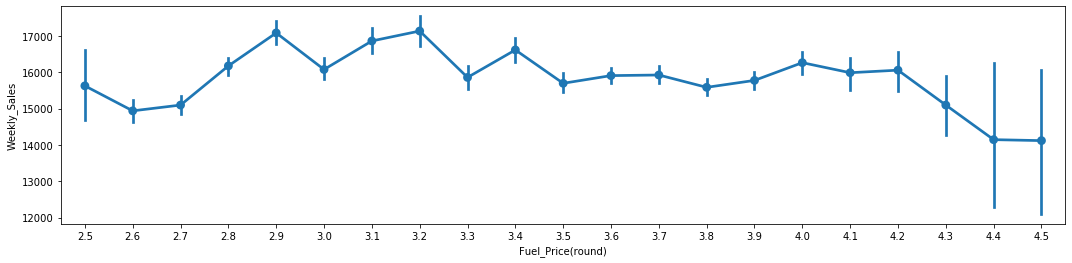

In [149]:
train_df['Fuel_Price(round)'] = train_df['Fuel_Price'].round(1)
test_df['Fuel_Price(round)'] = test_df['Fuel_Price'].round(1)

plt.figure(figsize=(18,4))
sns.pointplot(data=train_df, x='Fuel_Price(round)', y='Weekly_Sales')
# 비쌀수록 매출액이 떨어지긴 하지만 싸다고 매출액이 높은 것만은 아님

#### CPI (Consumer Price Index) : 소비자 물가지수

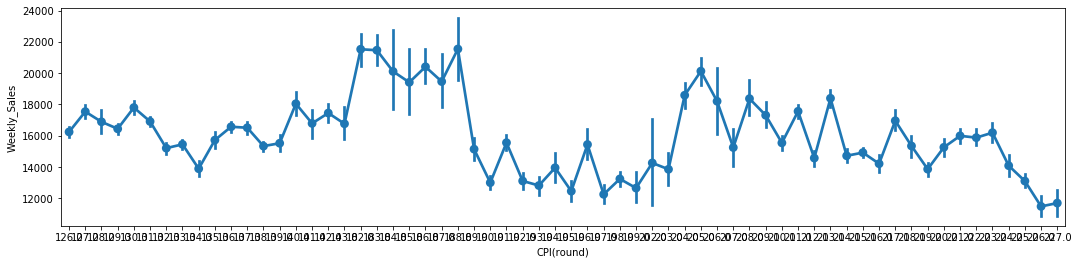

In [150]:
train_df['CPI(round)'] = train_df['CPI'].round()
test_df['CPI(round)'] = test_df['CPI'].round()

plt.figure(figsize=(18,4))
sns.pointplot(data=train_df, x='CPI(round)', y='Weekly_Sales')
# 비쌀수록 매출액이 떨어지긴 하지만 싸다고 매출액이 높은 것만은 아님

#### Unemployment : 실업률

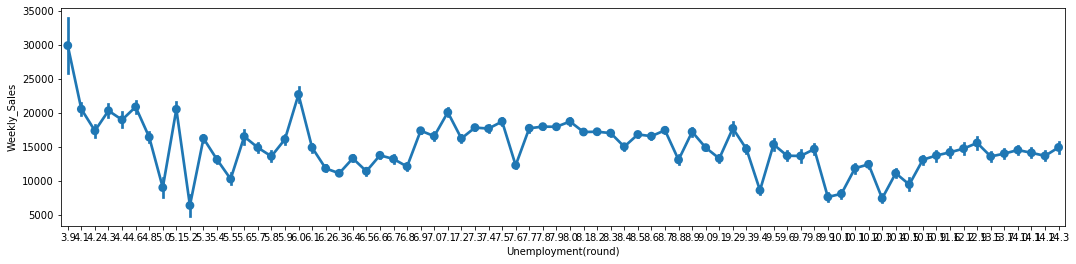

In [151]:
train_df['Unemployment(round)'] = train_df['Unemployment'].round(1)
test_df['Unemployment(round)'] = test_df['Unemployment'].round(1)

plt.figure(figsize=(18,4))
sns.pointplot(data=train_df, x='Unemployment(round)', y='Weekly_Sales')
# 비쌀수록 매출액이 떨어지긴 하지만 싸다고 매출액이 높은 것만은 아님

#### Type

In [152]:
train_df['Type'].value_counts()

A    215478
B    163495
C     42597
Name: Type, dtype: int64

In [153]:
train_df.groupby('Type')['Weekly_Sales'].mean()

Type
A    20099.568043
B    12237.075977
C     9519.532538
Name: Weekly_Sales, dtype: float64

#### Size

In [154]:
# Type에 이미 들어간거아닌가?

#### Markdown

In [155]:
# ????

In [156]:
train_df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size', 'Year', 'Month',
       'Week', 'Weekday', 'Thanksgiving', 'Christmas', 'Temperature(round)',
       'Fuel_Price(round)', 'CPI(round)', 'Unemployment(round)'],
      dtype='object')

#### Weekly_Sales

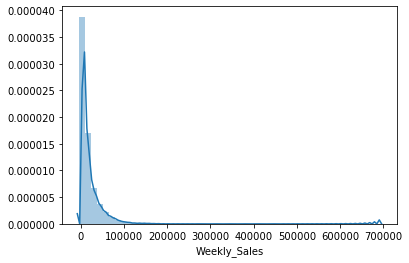

In [157]:
sns.distplot(train_df['Weekly_Sales'])
# 과도하게 좌편향된 타겟칼럼

In [158]:
train_df['Weekly_Sales'].describe()
# 최솟값이 음수

count    421570.000000
mean      15981.258123
std       22711.183519
min       -4988.940000
25%        2079.650000
50%        7612.030000
75%       20205.852500
max      693099.360000
Name: Weekly_Sales, dtype: float64

## 데이터 전처리

#### 원-핫 인코딩

In [159]:
train_df = pd.get_dummies(train_df, columns=['Month','Type','Christmas', 'Thanksgiving'])
test_df = pd.get_dummies(test_df, columns=['Month','Type','Christmas', 'Thanksgiving'])

#### 필요없는 컬럼 제거 및 데이터 분할

In [160]:
train_drop_columns = ['Date', 'Temperature','Temperature(round)', 'Fuel_Price','Fuel_Price(round)',\
                      'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',\
                      'MarkDown5', 'CPI','CPI(round)', 'Unemployment','Unemployment(round)',\
                      'Size', 'Weekday','Year','Month_8', 'Month_9', 'Month_10']
test_drop_columns = ['Date', 'Temperature','Temperature(round)', 'Fuel_Price','Fuel_Price(round)',\
                     'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',\
                    'MarkDown5', 'CPI','CPI(round)', 'Unemployment','Unemployment(round)', 'Size', 'Weekday','Year']

train_df.drop(train_drop_columns, axis=1, inplace=True)
test_df.drop(test_drop_columns, axis=1, inplace=True)

In [161]:
target = train_df['Weekly_Sales']
labels = train_df.drop('Weekly_Sales', axis=1)

In [162]:
print(target.shape)
print(labels.shape)
labels.head()

(421570,)
(421570, 20)


,Store,Dept,IsHoliday,Week,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_11,Month_12,Type_A,Type_B,Type_C,Christmas_0.0,Christmas_1.0,Thanksgiving_0.0,Thanksgiving_1.0
0,1,1,False,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0
1,1,1,True,6,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0
2,1,1,False,7,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0
3,1,1,False,8,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0
4,1,1,False,9,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0


## 학습 예측 평가

#### Tree모델

In [163]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

X_train, X_test, y_train, y_test = train_test_split(labels, target, test_size=0.2, random_state=0)

rf_reg = RandomForestRegressor(random_state=0, n_jobs=-1)
xgb_reg = XGBRegressor(n_estimators=1000, n_jobs=-1)
lgb_reg = LGBMRegressor(n_estimators=1000, n_jobs=-1)

rf_reg.fit(X_train, y_train)
rf_pred = rf_reg.predict(X_test)
xgb_reg.fit(X_train, y_train)
xgb_pred = xgb_reg.predict(X_test)
lgb_reg.fit(X_train, y_train)
lgb_pred = lgb_reg.predict(X_test)

rf_mae_val = mean_absolute_error(y_test, rf_pred)
xgb_mae_val = mean_absolute_error(y_test, xgb_pred)
lgb_mae_val = mean_absolute_error(y_test, lgb_pred)

[20:28:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [164]:
print('rf의 mae값', rf_mae_val)
print('xgb의 mae값', xgb_mae_val)
print('lgb의 mae값', lgb_mae_val)

rf의 mae값 1794.5554713697463
xgb의 mae값 5004.753314702397
lgb의 mae값 2429.3474315632097


In [165]:
#test_df['CPI(round)'] = test_df['CPI(round)'].fillna(test_df['CPI(round)'].mean())
#test_df['Unemployment(round)'] = test_df['Unemployment(round)'].fillna(test_df['Unemployment(round)'].mean())

In [174]:
prediction = rf_reg.predict(test_df)
prediction[:5]

array([37779.654175  , 19243.40066667, 19488.185725  , 20100.47634881,
       21265.77785   ])

In [175]:
submit = pd.read_csv('walmart/sampleSubmission.csv')
submit['Weekly_Sales'] = prediction

In [176]:
submit.to_csv("walmart_ver1.csv",index=False)

In [173]:
mae : 1713
kaggle : 5601